<a href="https://colab.research.google.com/github/llpk79/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Paul_K_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

In [128]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.animation as animation
import os

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [135]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head()

In [0]:
lifespan.head()

In [0]:
population.head()

In [0]:
pd.options.display.max_columns = 500
entities.head()

In [0]:
concepts.head()

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [136]:
merge = pd.merge(pd.merge(income, lifespan), population)
merge.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
columns = ['country', 'name', 'world_6region']
df = pd.merge(merge, entities[columns], left_on='geo', right_on='country')

In [138]:
df = df.drop(columns=['country', 'geo'])
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [139]:
column_names = {'time': 'year', 'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 'life_expectancy_years': 'lifespan',
               'population_total': 'population', 'name': 'country', 'world_6region': 'region'}
df = df.rename(columns=column_names)
df.head()

,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


## Explore data

In [0]:
df.skew()

In [0]:
df[df['year'] == 2018].skew()

In [0]:
df['country'].unique()

In [0]:
usa = df[df['country'] == 'United States']
usa[usa['year'].isin([1818, 1918, 2018])]

In [0]:
china = df[df['country'] == 'China']
china[china['year'].isin([1818, 1918, 2018])]

## Plot visualization

In [0]:
now = df[df['year'] == 2018]
now.head()

In [0]:
now.hist();

In [0]:
pd.plotting.scatter_matrix(now);

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            data=now);

In [0]:
now['log_income'] = np.log(now['income'])

In [0]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population',
           data=now);

## Analyze outliers

In [0]:
now[now['income'] > 80000].sort_values(by='income')

In [0]:
qatar = now[now['country'] == 'Qatar']
qatar_income = qatar['income'].values[0]
qatar_lifespan = qatar['lifespan'].values[0]
qatar_income, qatar_lifespan

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
           data=now)
plt.text(x=qatar_income - 5000, y=qatar_lifespan + 1, s='Qatar')
plt.title('Qatar has the highest income in 2008');

## Plot multiple years

In [0]:
years = [1818, 1918, 2018]

centuries = df[df['year'].isin(years)]

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
           col='year', data=centuries)
plt.xscale('log');

## Point out a story

In [0]:
years = [1918, 1938, 1958, 1978, 1998, 2018]
for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', size='population',
             data=df[df['year'] == year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((20, 90))
  plt.title(year)
  plt.axhline(y=50, color='grey')

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

In [0]:
now['population'].max()

In [0]:
# Make a 'relative population' column.
now['rel_pop'] = now['population'] / now['population'].max()
now.head()

In [0]:
  sns.relplot(x='income', y='lifespan', hue='region', size='population',
             data=now, sizes=(15, 100));

In [0]:
!rm -rf plots
!mkdir plots

In [0]:
years = list(range(1800, 2020, 5))

In [0]:
x = 0
for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', size='population',
             sizes=(15, 100), data=df[df['year'] == year])
  plt.grid(b=False)
  plt.text(x=20000, y=30, s=year)
  plt.xlim((100, 40000))
  plt.ylim((20, 90))
  plt.savefig(f'plots/{x}.png')
  x += 1

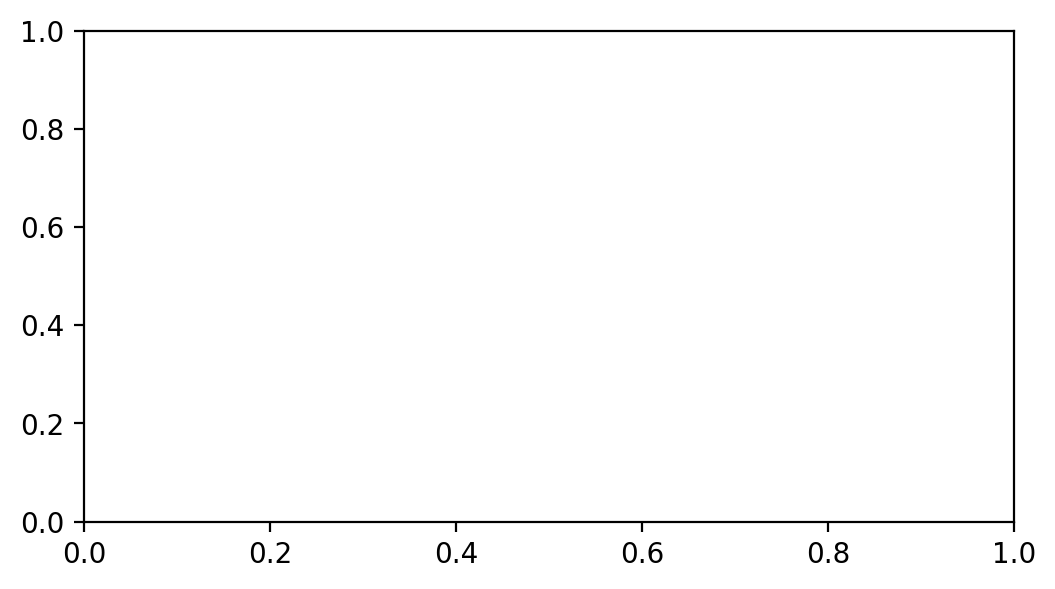

In [195]:
fig, ax = plt.subplots(figsize=(6, 3.25), dpi=200)
# plt.xlim((100, 40000))
# plt.ylim((20, 90))
# plt.grid(b=True, which='major', axis='both')
# plt.title('Income and lifespan increase over time.')

In [0]:
def animate(i):
  data = df[df['year'] == i]
  
  ax.cla()
  ax.grid(b=False)
  ax.text(x=20000, y=30, s=f'Year: {i}')
#   ax.grid(b=True, which='major', axis='both')
  ax.axhline(y=50, color='gray')
  ax.set_xlim((100, 900000))
  ax.set_xscale('log')
  ax.set_ylim((20, 90))
  ax.set_title('Income and lifespan increase over time.')
  sns.relplot(x='income', y='lifespan', hue='region',
              size='population', sizes=(15, 100), data=data,
              ax=ax)


In [178]:
animation.writers.list()

['pillow', 'ffmpeg', 'ffmpeg_file', 'html']

In [0]:
Writer = animation.writers['ffmpeg_file']
writer = Writer(fps=10, bitrate=1800)

In [0]:
anim = animation.FuncAnimation(fig, animate, frames=range(1800, 2020, 5), repeat=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


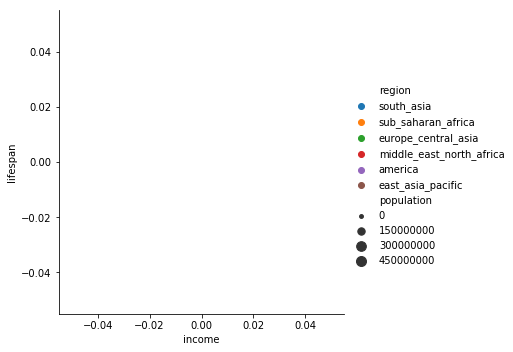

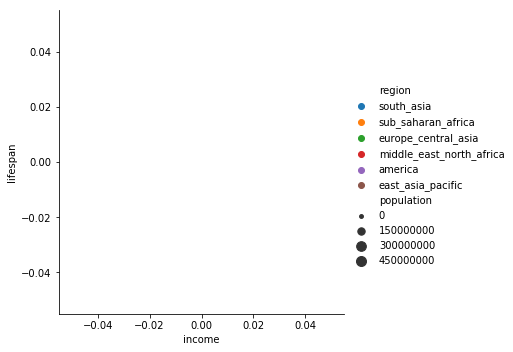

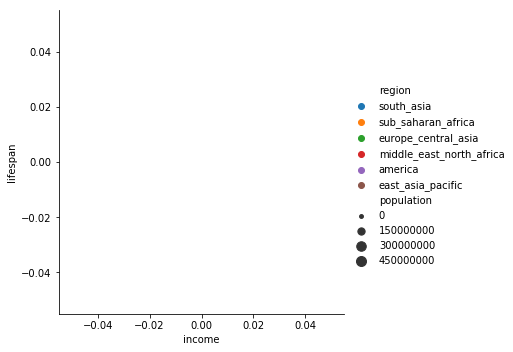

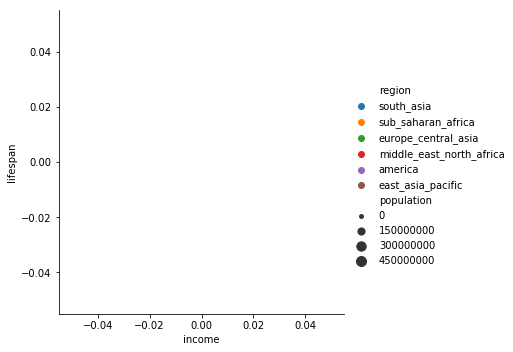

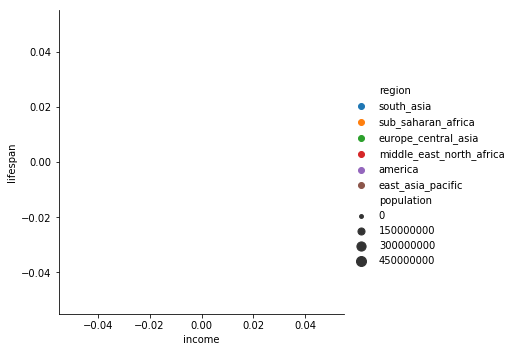

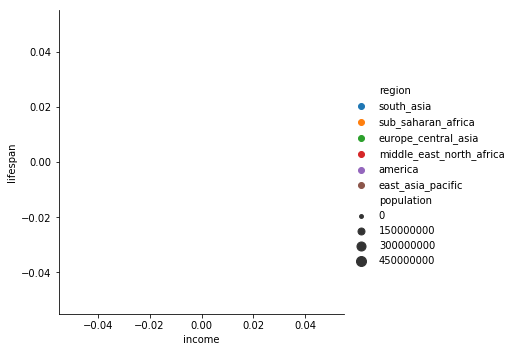

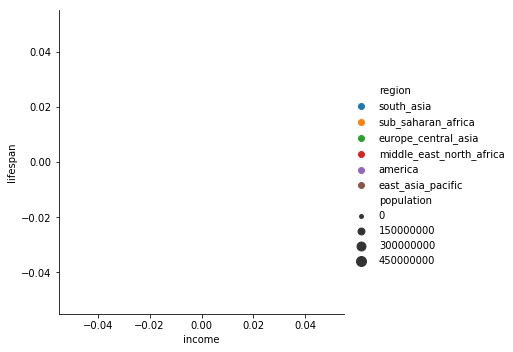

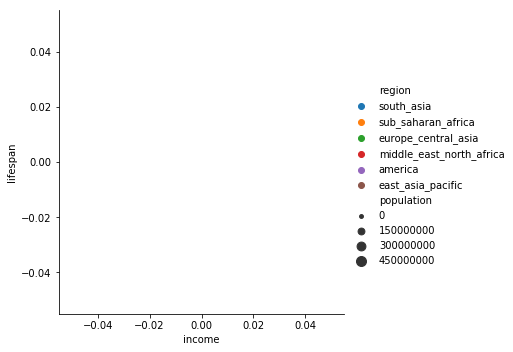

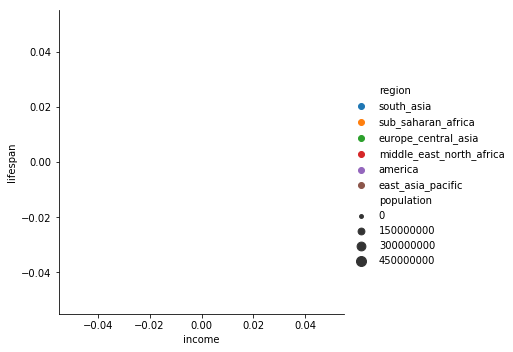

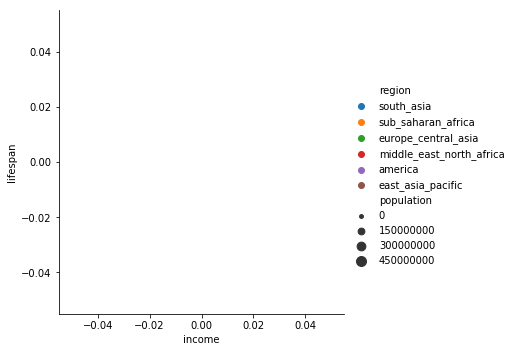

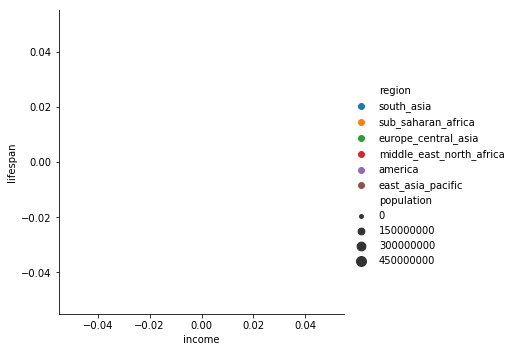

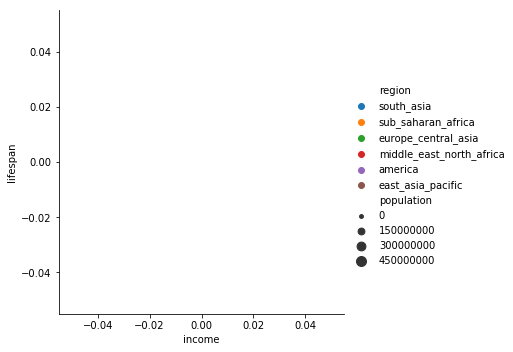

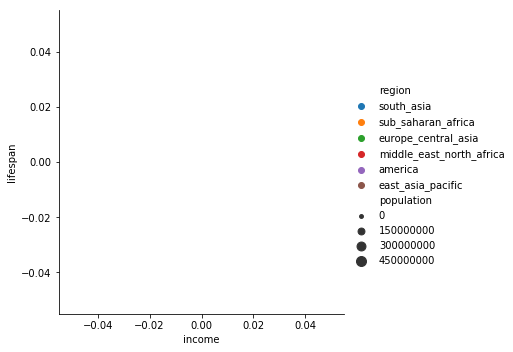

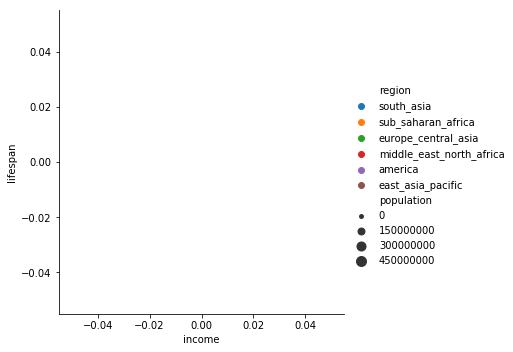

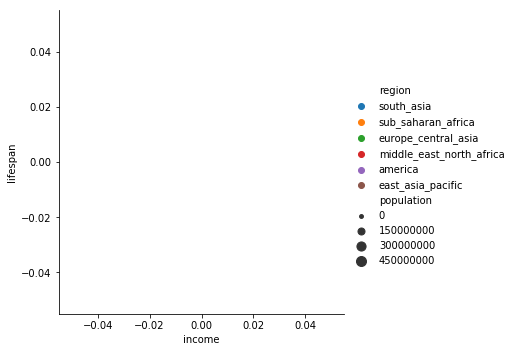

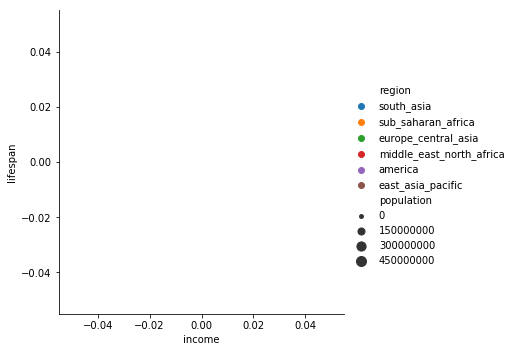

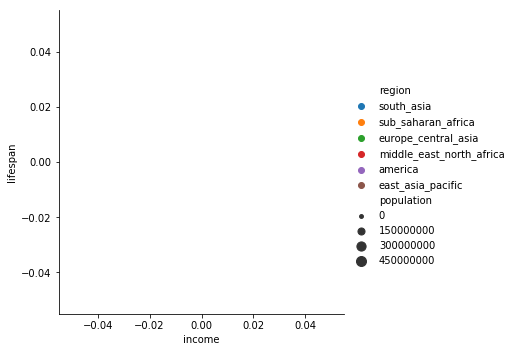

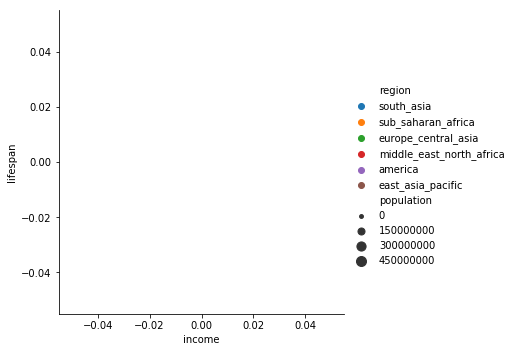

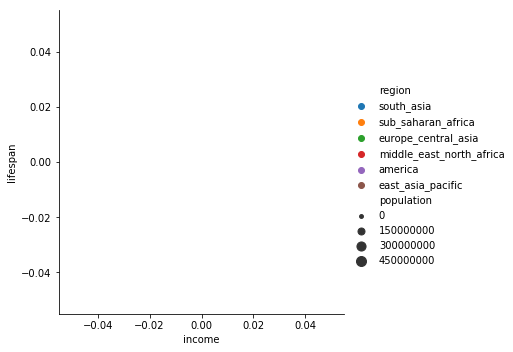

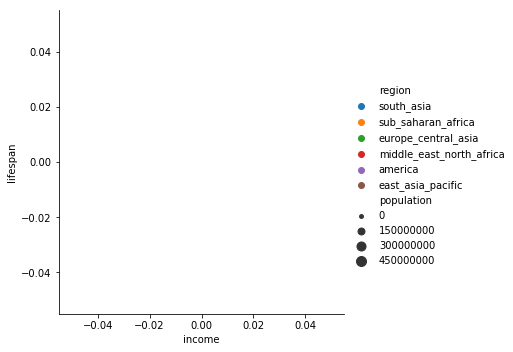

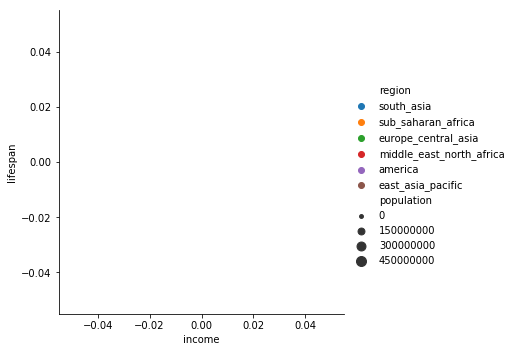

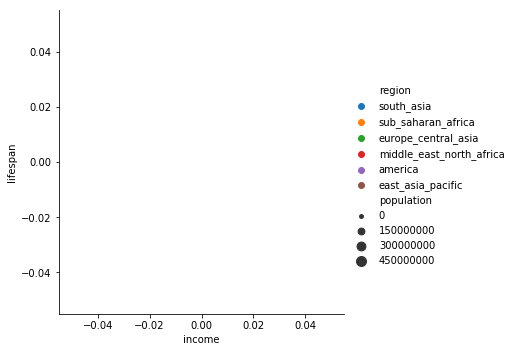

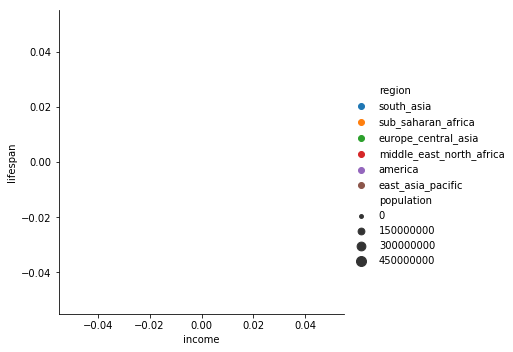

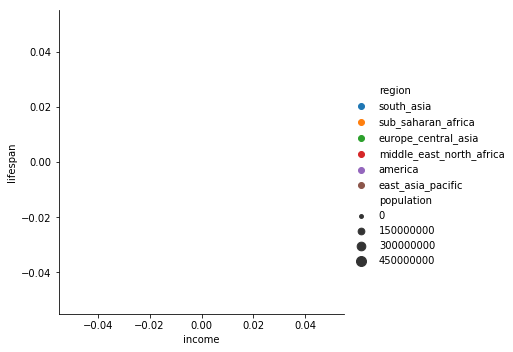

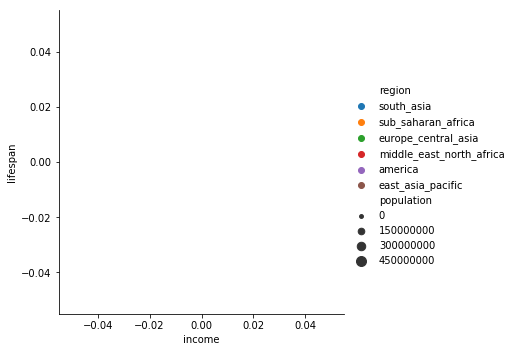

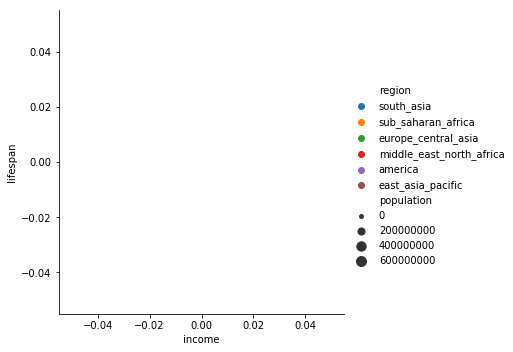

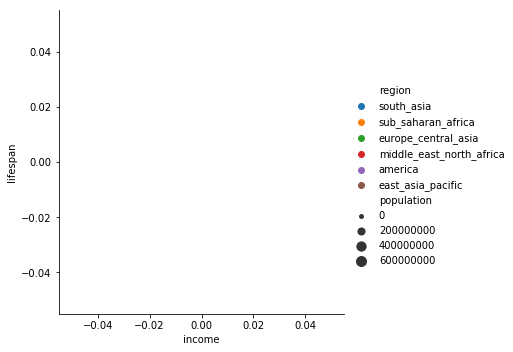

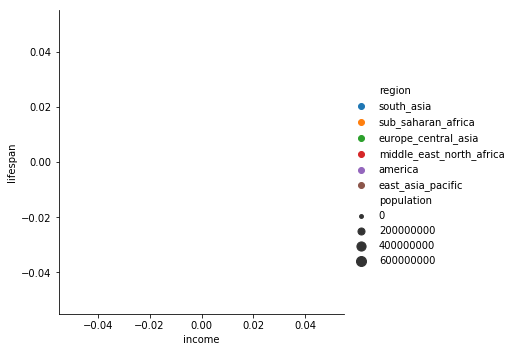

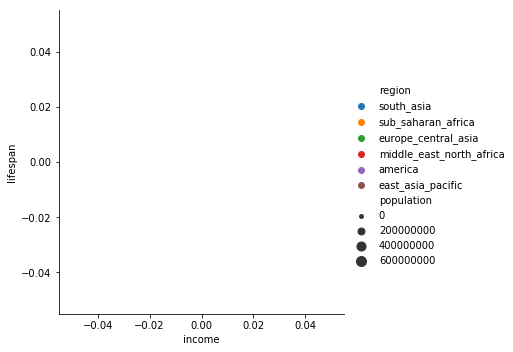

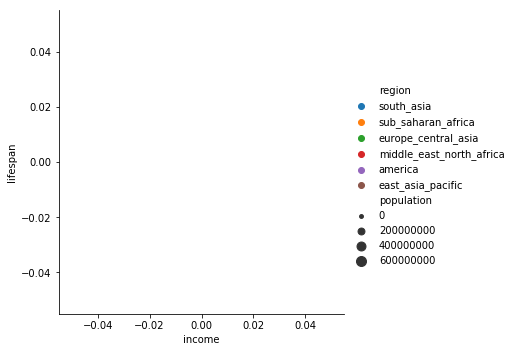

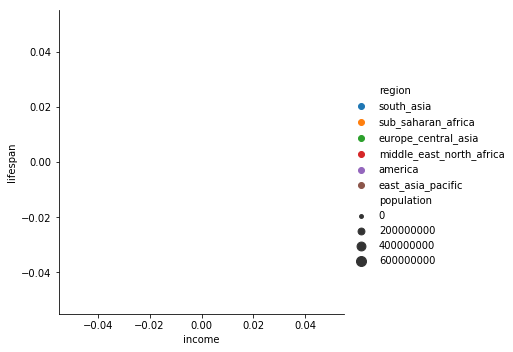

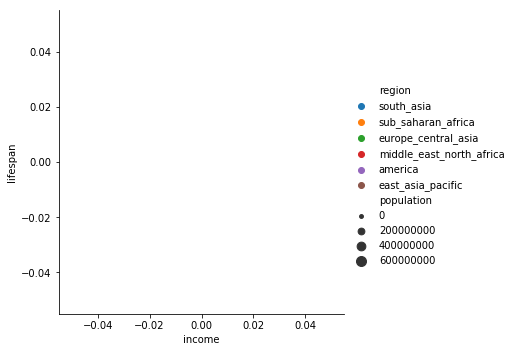

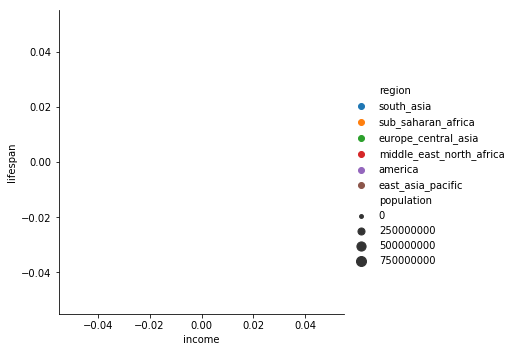

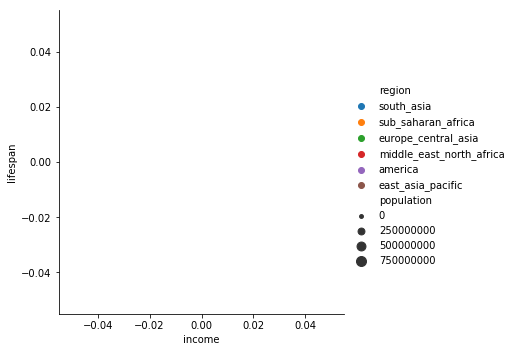

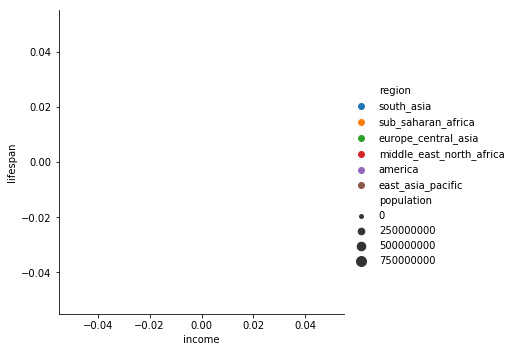

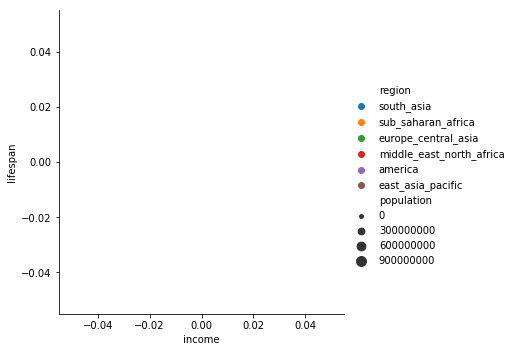

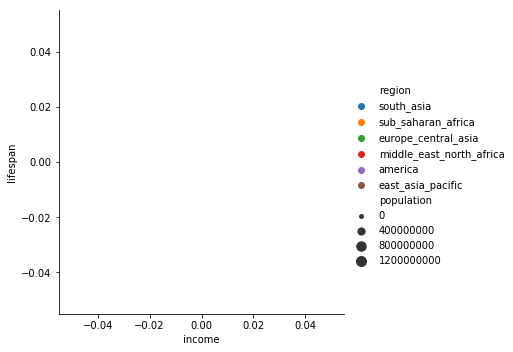

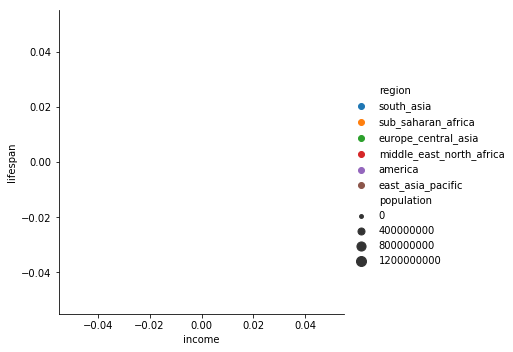

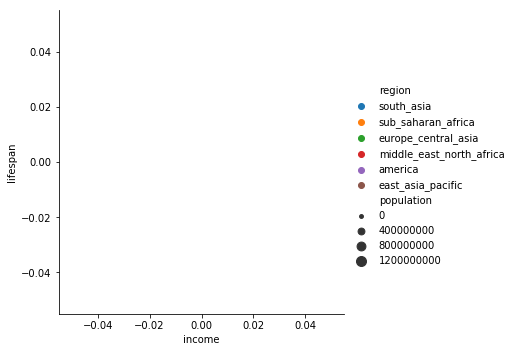

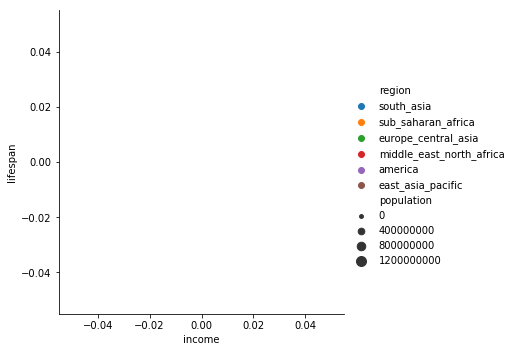

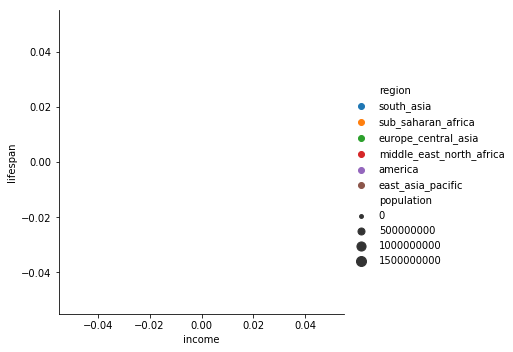

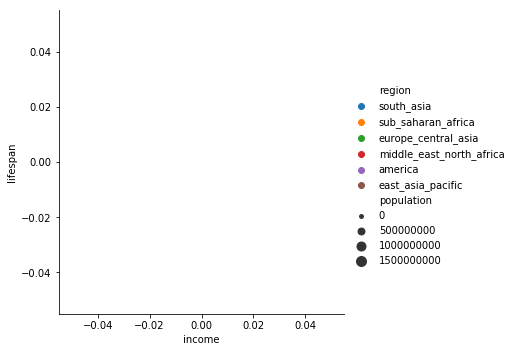

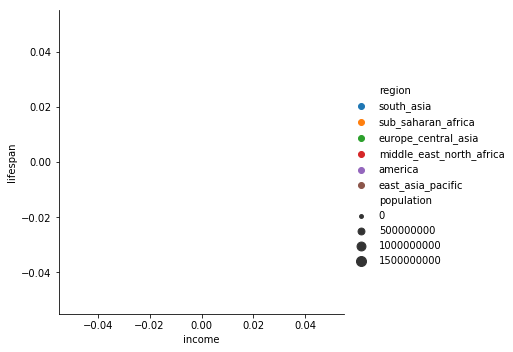

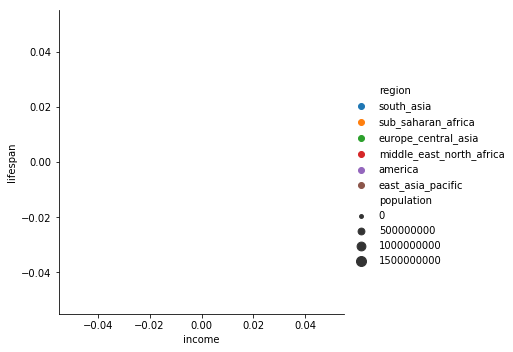

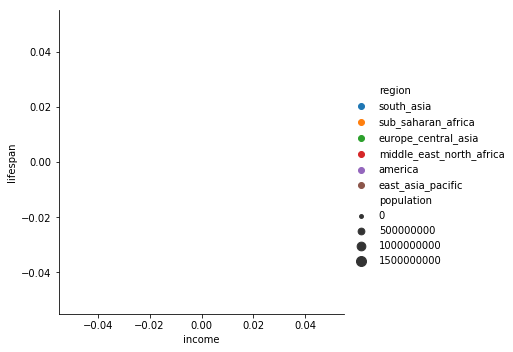

In [217]:
anim.save('lifespan.mp4', writer=writer)

In [0]:
plt.show()